In [15]:
#gradient descent "more sophisticated" 

In [ ]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.animation as animation

In [ ]:
from matplotlib import rc
rc('animation', html='jshtml')

In [ ]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

In [ ]:
data = pd.read_excel('/content/gradient descent.xlsx')

In [ ]:
data.head()

,Area _Squared_Meter,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000


In [ ]:
#Grab the relevant data, scale the predictor variable, and add a column of 1s for the gradient descent...
x = data['Area _Squared_Meter']
y = data['SalePrice']

x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x] 

In [ ]:
alpha = 0.01 #Step size
iterations = 2000 #No. of iterations
m = y.size #No. of data points
np.random.seed(123) #Set the seed
theta = np.random.rand(2) #Pick some random values to start with


#GRADIENT DESCENT
def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
        
    return past_thetas, past_costs

#Pass the relevant variables to the function and get the new values back...
past_thetas, past_costs = gradient_descent(x, y, theta, iterations, alpha)
theta = past_thetas[-1]

#Print the results...
print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))

Gradient Descent: 180921.20, 56294.90


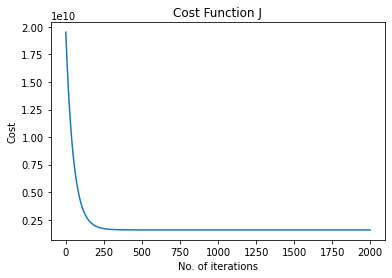

In [ ]:
#Plot the cost function...
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()

In [ ]:
#Animation

#Set the plot up,
fig = plt.figure()
ax = plt.axes()
plt.title('Sale Price vs Living Area')
plt.xlabel('Living Area in square feet (normalised)')
plt.ylabel('Sale Price ($)')
plt.scatter(x[:,1], y, color='red')
line, = ax.plot([], [], lw=2)
annotation = ax.text(-1, 700000, '')
annotation.set_animated(True)
plt.close()

#Generate the animation data,
def init():
    line.set_data([], [])
    annotation.set_text('')
    return line, annotation



In [ ]:
# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(-5, 20, 1000)
    y = past_thetas[i][1]*x + past_thetas[i][0]
    line.set_data(x, y)
    annotation.set_text('Cost = %.2f e10' % (past_costs[i]/10000000000))
    return line, annotation



In [ ]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=300, interval=0.1, blit=True)



In [ ]:
anim = animation.FuncAnimation(fig, frame, frames=100, blit=False, repeat=True)

NameError: ignored

In [ ]:
anim

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#Simple Way

In [ ]:
data = pd.read_excel('/content/gradient descent.xlsx')

In [ ]:
data.head()

In [ ]:
x1 = data['Area _Squared_Meter'].values.reshape(-1, 1)
y1 = data['SalePrice'].values

In [ ]:
x1

In [ ]:
y1

In [ ]:
from sklearn.linear_model import LinearRegression
lin_regr=LinearRegression()
lin_regr.fit(x1,y1)

In [ ]:
plt.scatter(x1,y1,color='red')
plt.plot(x1,lin_reg.predict(x1),color='blue')
plt.title('Truth Or Bluff (Linear Regression)')
plt.xlabel('area')
plt.ylabel('Sale')
plt.show()

In [ ]:
lin_regr.predict([[6.5]])